In [1]:
import cv2 as cv
import torch
import numpy as np

In [2]:
x=np.ones((49*69,4812-200)) 
x_test=np.ones((49*69,200))
y=torch.ones((4812-200,2))
y_test=torch.ones((200,2))

In [3]:
for i in range(1,2334-100+1):
    str_temp="/home/enigma/igvc_ml/nn/0_"+str(i)+" .jpg"
    img=cv.imread(str_temp,0)
    x[:,i-1]=np.resize(img,(1,69*49))
    y[i-1,0]=0
    
for i in range(2334-100+1,2334+1):
    str_temp="/home/enigma/igvc_ml/nn/0_"+str(i)+" .jpg"
    img=cv.imread(str_temp,0)
    x_test[:,i-(2334-100+1)]=np.resize(img,(1,69*49))
    y_test[i-(2334-100+1),0]=0
    
for i in range(1,2478-100+1):
    str_temp="/home/enigma/igvc_ml/nn/1_"+str(i)+" .jpg"
    img=cv.imread(str_temp,0)
    x[:,i+2334-100-1]=np.resize(img,(1,69*49))
    y[i+2334-100-1,1]=0
for i in range(2478-100+1,2478+1):
    str_temp="/home/enigma/igvc_ml/nn/1_"+str(i)+" .jpg"
    img=cv.imread(str_temp,0)
    x_test[:,i+200-1-2478]=np.resize(img,(1,69*49))
    y_test[i-2478+200-1,1]=0


In [4]:
print(x)
print(x.shape)
print(y)
print(y.shape)
print(x_test)
print(x_test.shape)
print(y_test)
print(y_test.shape)

[[ 253.   35.   38. ...,   22.   23.   39.]
 [ 255.   34.   36. ...,   24.   22.   41.]
 [ 255.   30.   36. ...,   21.   27.   44.]
 ..., 
 [  36.   40.   33. ...,   35.   31.   50.]
 [  36.   38.   35. ...,   31.   32.   49.]
 [  32.   41.   35. ...,   28.   29.   51.]]
(3381, 4612)
tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])
torch.Size([4612, 2])
[[ 23.  63.  60. ...,  40.  42.  38.]
 [ 22.  71.  64. ...,  36.  47.  36.]
 [ 21.  72.  64. ...,  39.  44.  23.]
 ..., 
 [ 35.  24.  39. ...,  66.  36.  24.]
 [ 34.  22.  39. ...,  70.  35.  31.]
 [ 31.  18.  43. ...,  64.  34.  42.]]
(3381, 200)
tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],

In [32]:
x

tensor([[0.2588, 0.2510, 0.2471,  ..., 0.3725, 0.3647, 0.3765],
        [0.1137, 0.1216, 0.1373,  ..., 0.1020, 0.1059, 0.0980],
        [0.2863, 0.2824, 0.3137,  ..., 0.2863, 0.2745, 0.2078],
        ...,
        [0.1176, 0.1216, 0.1216,  ..., 0.1373, 0.1451, 0.1373],
        [0.1961, 0.2078, 0.2078,  ..., 0.1843, 0.1647, 0.2196],
        [0.1373, 0.1647, 0.1608,  ..., 0.1882, 0.1843, 0.1529]])

In [5]:
permutation = np.random.permutation(x.shape[1])
x = x[:,permutation]
y = y[permutation,:]

In [6]:
device = torch.device('cpu')
print(x.shape)
x=np.transpose(x)
x = x/255.
print(x.shape)
x =torch.tensor(x, device=device).float()
x_test=np.transpose(x_test)
x_test = x_test/255.
print(x_test.shape)
x_test =torch.tensor(x_test, device=device).float()

(3381, 4612)
(4612, 3381)
(200, 3381)


In [7]:
x.shape

torch.Size([4612, 3381])

In [8]:
y

tensor([[1., 0.],
        [0., 1.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])

In [9]:
y.dtype

torch.float32

In [10]:
torch.cuda.is_available()

False

In [11]:
y.shape

torch.Size([4612, 2])

In [12]:
N, D_in, H1,H2, D_out = 4812, 49*69, 1500,500, 2

In [13]:
device = torch.device('cpu')

In [16]:
model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H1),
          torch.nn.ReLU(),
          torch.nn.Linear(H1, H2),
          torch.nn.ReLU(),
          torch.nn.Linear(H2, D_out),
          torch.nn.Softmax(1),
        ).to(device)

In [17]:
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 3e-4, betas = (0.9, 0.999), eps = 1e-8)
# learning_rate = 1e-4

In [18]:
correct=0
for t in range(20):
    y_pred = model(x)#torch.nn.functional.softmax(model(x))
    loss = loss_fn(y_pred, y)
    print(t, loss.item(),correct)
    optimizer.zero_grad()
    loss.backward()
#     with torch.no_grad():
#         for param in model.parameters():
#             param.data -= learning_rate * param.grad
    optimizer.step()
    a=(y_pred>0.5)
    a=a.numpy()
    b=y.numpy()
    correct=0
    for i in range(4612):
        if float(a[i,0])==b[i,0] and float(a[i,1])==b[i,1] :
            correct=correct+1
    correct=correct/46.12
    #print(correct/4612)    

0 0.6906532645225525 0
1 0.7021989822387695 47.81006071118821
2 0.6674368977546692 48.438855160451
3 0.6604099273681641 88.13963573287077
4 0.6528605818748474 87.96617519514311
5 0.6312967538833618 48.438855160451
6 0.6119062304496765 48.438855160451
7 0.590752899646759 87.70598438855161
8 0.5701146125793457 88.42150910667823
9 0.5432073473930359 89.70078057241977
10 0.5178282260894775 89.98265394622725
11 0.492212176322937 86.99045967042498
12 0.46800366044044495 87.64093668690373
13 0.4421653747558594 88.83347788378144
14 0.4173176884651184 87.61925411968778
15 0.3940370976924896 87.61925411968778
16 0.3712739050388336 88.7033824804857
17 0.3504829704761505 88.83347788378144
18 0.33150771260261536 88.63833477883782
19 0.314298540353775 89.15871639202082


In [19]:
s=model(x_test)

In [20]:
print(s)

tensor([[1.5324e-01, 8.4676e-01],
        [2.6497e-01, 7.3503e-01],
        [3.9040e-01, 6.0960e-01],
        [1.4750e-01, 8.5250e-01],
        [4.2378e-01, 5.7622e-01],
        [9.2489e-03, 9.9075e-01],
        [3.4645e-03, 9.9654e-01],
        [3.0127e-01, 6.9873e-01],
        [4.9750e-03, 9.9502e-01],
        [8.6490e-03, 9.9135e-01],
        [1.5690e-01, 8.4310e-01],
        [2.5791e-01, 7.4209e-01],
        [4.5768e-01, 5.4232e-01],
        [2.2524e-02, 9.7748e-01],
        [3.4045e-02, 9.6595e-01],
        [6.3814e-02, 9.3619e-01],
        [6.4086e-02, 9.3591e-01],
        [3.2531e-02, 9.6747e-01],
        [6.0920e-06, 9.9999e-01],
        [2.1887e-01, 7.8113e-01],
        [1.3499e-05, 9.9999e-01],
        [5.5137e-01, 4.4863e-01],
        [5.0283e-01, 4.9717e-01],
        [5.5761e-01, 4.4239e-01],
        [4.3345e-01, 5.6655e-01],
        [4.5330e-01, 5.4670e-01],
        [4.5281e-01, 5.4719e-01],
        [5.1137e-03, 9.9489e-01],
        [6.4507e-03, 9.9355e-01],
        [3.800

In [21]:
s=s>0.5

In [22]:
s=s.numpy()

In [23]:
c=y_test.numpy()

In [24]:
correct=0

In [35]:
for i in range(200):
        if float(s[i,0])==c[i,0] and float(s[i,1])==c[i,1] :
            correct=correct+1

In [26]:
c


array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,

In [27]:
correct/2

86.5

In [28]:
torch.save(model, 'tensor1.pt')


not lane


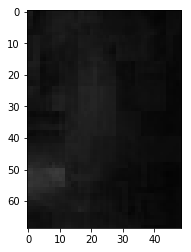

In [152]:
key = 0
for i in range(200):
    if float(s[i,0])!=c[i,0] or float(s[i,1])!=c[i,1] :
            a=(255*x_test[i,:]).numpy()
            a=np.resize(a,(49,69)).reshape(69,-1)
            a = a.astype(int)
            #print(a)
            if key==10:
                if s[i,0]==0 and s[i,1]==1:
                    plt.imshow(a, cmap='gray', vmin=0, vmax=255)
                    print("lane")
                if s[i,0]==1 and s[i,1]==0:
                    plt.imshow(a, cmap='gray', vmin=0, vmax=255)
                    print("not lane")
            key += 1

            

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

lane


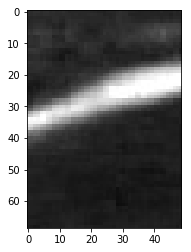

In [141]:
key = 0
for i in range(200):
    if float(s[i,0])==c[i,0] and float(s[i,1])==c[i,1] :
            a=(255*x_test[i,:]).numpy()
            a=np.resize(a,(69,49))
            a = a.astype(int)
            #print(a)
            if key==13:
                if s[i,0]==0 and s[i,1]==1:
                    plt.imshow(a, cmap='gray', vmin=0, vmax=255)
                    print("lane")
                if s[i,0]==1 and s[i,1]==0:
                    plt.imshow(a, cmap='gray', vmin=0, vmax=255)
                    print("not lane")
            key += 1
